In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression_cv2.db', mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100, embedding_dim=2)

10/10/2020 13:51:17 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/10/2020 13:51:18 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/10/2020 13:51:20 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/10/2020 13:51:21 Loading Nifti image /home/eli/Documents/sound_depression/nifti_files/sub-control01_run5_nonmusic_mc_MNI_masked.nii.gz with mask /home/eli/Documents/sound_depression/mask/sou

In [7]:
dtfa.num_blocks

618

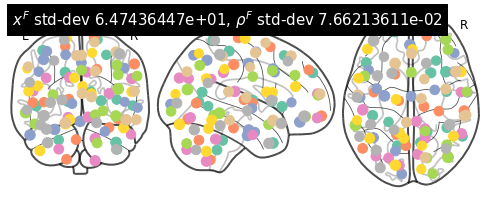

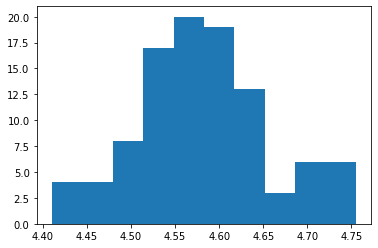

(<nilearn.plotting.displays.OrthoProjector at 0x7fbeaa7d98d0>,
 tensor([[ 5.5264e+01, -5.4521e+01, -9.7610e-03],
         [-2.2588e+01, -3.9241e+01, -3.6201e+01],
         [ 2.7445e+01,  2.5258e+01,  5.3381e+01],
         [-4.6005e+01,  2.3160e+01, -3.8155e-01],
         [ 1.7919e+01, -4.9543e+01,  6.9612e+01],
         [-1.3237e+01, -6.4361e+01,  4.3732e+00],
         [ 3.8499e+01, -7.3783e+00,  6.3136e+00],
         [ 3.7693e+01,  1.3567e+01, -3.8806e+01],
         [-3.9332e+01, -3.2425e+01,  5.7947e+01],
         [ 3.8715e+01, -4.5229e+01, -4.6095e+01],
         [ 2.2026e+01,  1.2433e+01,  5.1034e+00],
         [ 1.1158e+01, -6.0861e+01,  1.4644e+01],
         [-1.5869e+01,  5.5481e+01,  3.5039e+01],
         [ 1.5636e+01,  6.4715e+01, -1.0380e+01],
         [-1.1838e+01, -1.6928e+01,  6.7316e+00],
         [-1.5687e+01,  1.0851e+01,  6.2253e+01],
         [-4.2756e+00, -6.4280e+01, -3.5856e+01],
         [ 5.6988e+01, -2.7559e+01,  4.3721e+01],
         [-3.8085e+01, -8.0998e+00,  

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 5e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=True, blocks_filter=lepping_db.inference_filter(training=True, held_out_tasks=set(['tones', 'response'])))

10/10/2020 13:55:29 [Epoch 1] (9200ms) Posterior free-energy 1.73014794e+10 = KL from prior 1.08829530e+07 - log-likelihood -1.72905964e+10
10/10/2020 13:55:29 Saving checkpoint...
10/10/2020 13:55:38 [Epoch 2] (9038ms) Posterior free-energy 1.69874924e+10 = KL from prior 3.65157375e+06 - log-likelihood -1.69838418e+10
10/10/2020 13:55:47 [Epoch 3] (8819ms) Posterior free-energy 1.67066634e+10 = KL from prior 1.16324250e+06 - log-likelihood -1.67055002e+10
10/10/2020 13:55:56 [Epoch 4] (8844ms) Posterior free-energy 1.65197752e+10 = KL from prior 6.14651625e+05 - log-likelihood -1.65191608e+10
10/10/2020 13:56:05 [Epoch 5] (8846ms) Posterior free-energy 1.63187671e+10 = KL from prior 5.14947500e+05 - log-likelihood -1.63182510e+10
10/10/2020 13:56:13 [Epoch 6] (8809ms) Posterior free-energy 1.61630024e+10 = KL from prior 4.76800156e+05 - log-likelihood -1.61625272e+10
10/10/2020 13:56:22 [Epoch 7] (8807ms) Posterior free-energy 1.60290877e+10 = KL from prior 4.62012156e+05 - log-likeli

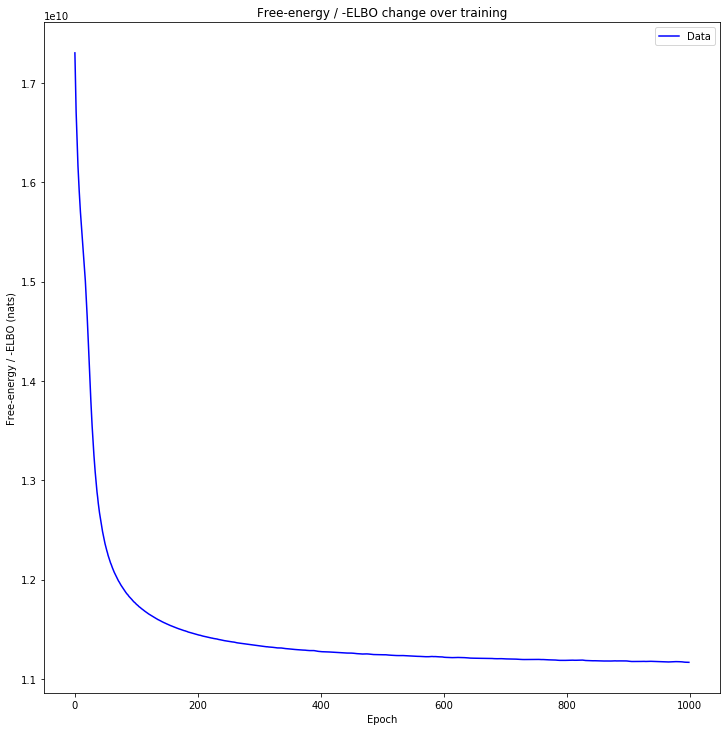

In [10]:
utils.plot_losses(losses)

In [11]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=False, blocks_filter=lepping_db.inference_filter(training=False, held_out_tasks=set(['tones', 'response'])))

10/10/2020 16:21:53 [Epoch 1] (2912ms) Posterior free-energy 7.99573709e+09 = KL from prior 2.85057000e+05 - log-likelihood -7.99545242e+09
10/10/2020 16:21:53 Saving checkpoint...
10/10/2020 16:21:56 [Epoch 2] (2969ms) Posterior free-energy 7.78554368e+09 = KL from prior 2.84174188e+05 - log-likelihood -7.78526003e+09
10/10/2020 16:21:59 [Epoch 3] (2910ms) Posterior free-energy 7.69481421e+09 = KL from prior 2.83480438e+05 - log-likelihood -7.69453005e+09
10/10/2020 16:22:02 [Epoch 4] (2912ms) Posterior free-energy 7.54561946e+09 = KL from prior 2.83519500e+05 - log-likelihood -7.54533683e+09
10/10/2020 16:22:05 [Epoch 5] (2914ms) Posterior free-energy 7.38256947e+09 = KL from prior 2.83114094e+05 - log-likelihood -7.38228634e+09
10/10/2020 16:22:08 [Epoch 6] (2910ms) Posterior free-energy 7.25786880e+09 = KL from prior 2.83658938e+05 - log-likelihood -7.25758566e+09
10/10/2020 16:22:11 [Epoch 7] (2909ms) Posterior free-energy 7.18135962e+09 = KL from prior 2.83074312e+05 - log-likeli

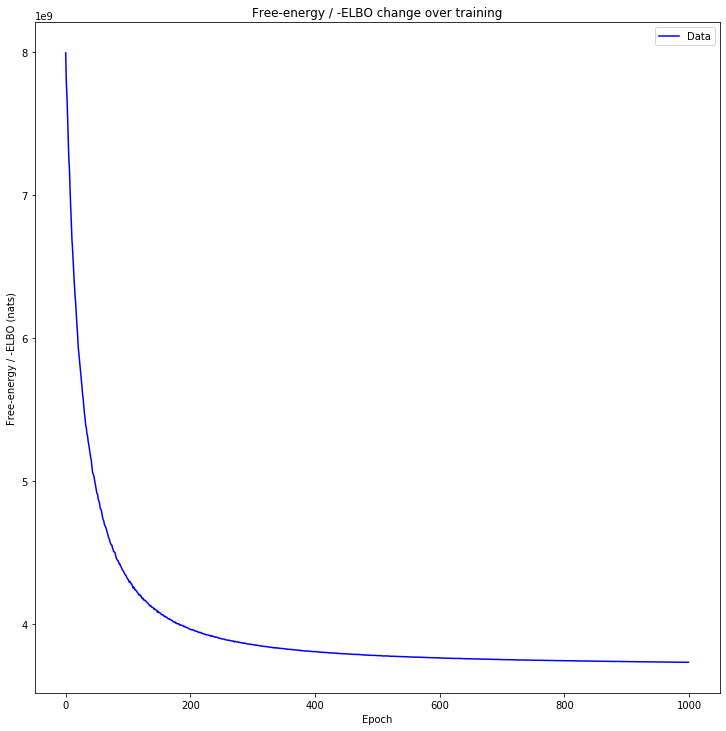

In [12]:
utils.plot_losses(losses)

In [13]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [14]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    elif task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = task.capitalize()
    return task

In [15]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.subject)
    return subject + ', ' + task + ' stimulus'

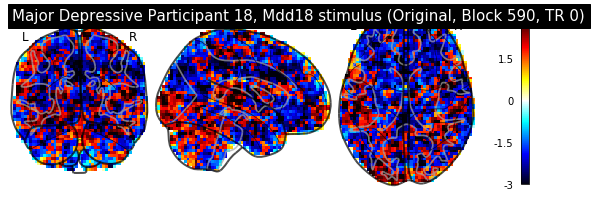

10/10/2020 17:10:08 Reconstruction Error (Frobenius Norm): 1.25237061e+02 out of 8.23785645e+02


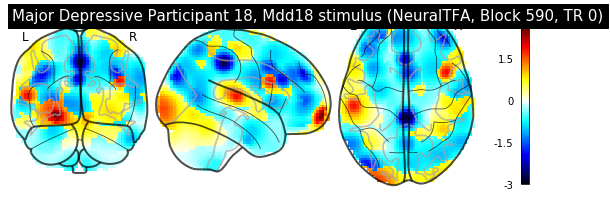

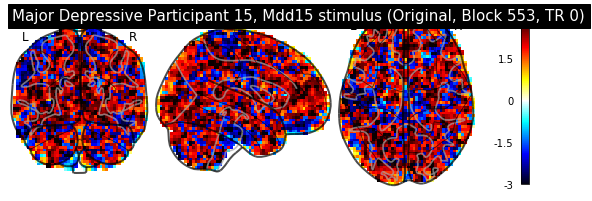

10/10/2020 17:10:11 Reconstruction Error (Frobenius Norm): 1.57047653e+02 out of 9.37374146e+02


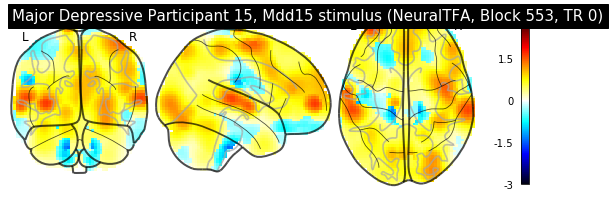

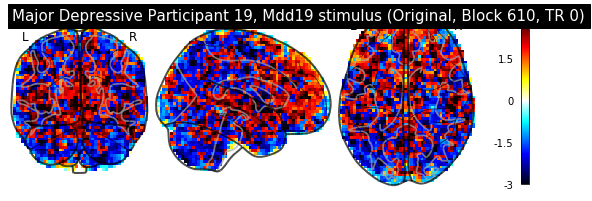

10/10/2020 17:10:13 Reconstruction Error (Frobenius Norm): 1.37342545e+02 out of 8.13430847e+02


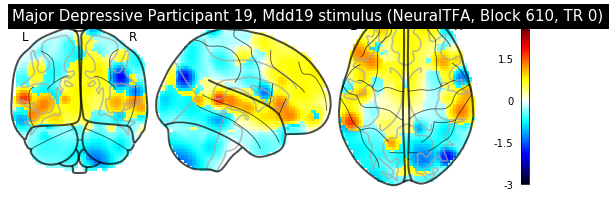

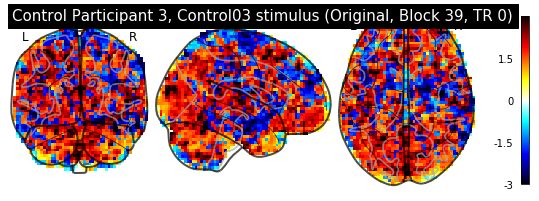

10/10/2020 17:10:16 Reconstruction Error (Frobenius Norm): 1.11430435e+02 out of 7.48114075e+02


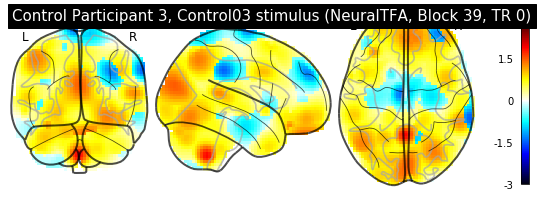

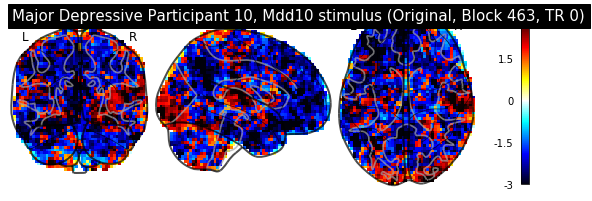

10/10/2020 17:10:19 Reconstruction Error (Frobenius Norm): 1.43431030e+02 out of 8.37642273e+02


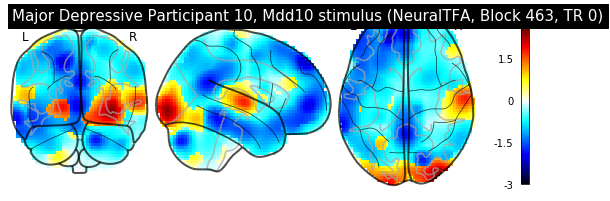

In [16]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

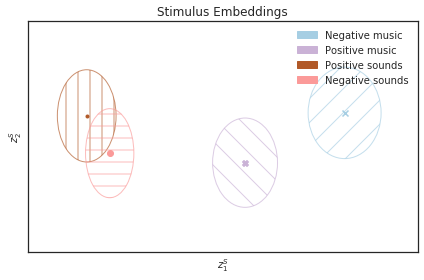

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Paired', legend_ordering=[0, 2, 3, 1])

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


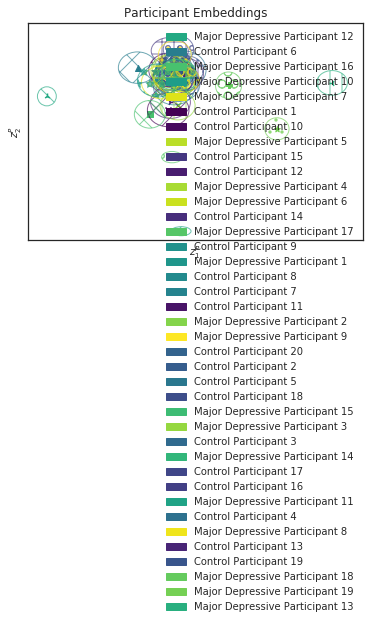

In [18]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

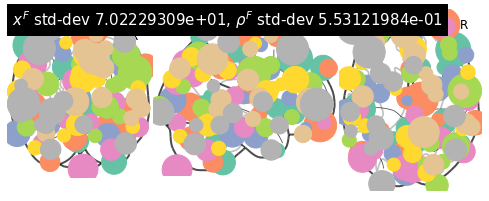

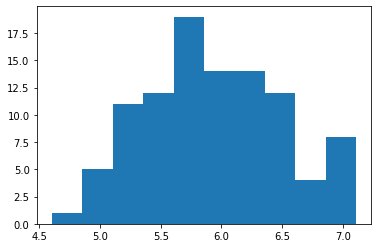

(<nilearn.plotting.displays.OrthoProjector at 0x7fbe901e1d90>,
 tensor([[ 5.4555e+01, -6.1507e+01,  2.3615e+00],
         [-2.9001e+00, -4.5778e+01, -3.7526e+01],
         [ 4.5549e+01,  3.6833e+01,  5.0004e+01],
         [-4.5932e+01,  3.6437e+01, -7.8651e+00],
         [ 6.2723e+00, -6.3566e+01,  7.2609e+01],
         [-1.7269e+01, -5.9664e+01, -1.7738e+00],
         [ 4.6581e+01,  2.5900e+00, -1.4357e+00],
         [ 3.6116e+01,  1.8172e+01, -4.6684e+01],
         [-5.3540e+01, -2.5700e+01,  6.3414e+01],
         [ 3.5606e+01, -3.8978e+01, -5.9223e+01],
         [ 1.1301e+01,  1.7643e+01, -2.5911e+00],
         [ 2.0995e+00, -5.0553e+01,  8.7965e+00],
         [-1.6029e+01,  6.6503e+01,  4.0346e+01],
         [ 3.5344e+01,  6.3390e+01, -2.0256e+01],
         [-2.3859e+00, -1.4049e+01,  1.4253e+01],
         [-9.7069e-01,  1.6850e+01,  7.1385e+01],
         [-5.8472e+00, -7.2152e+01, -3.4398e+01],
         [ 6.8666e+01, -4.0148e+01,  4.1430e+01],
         [-4.4768e+01, -1.5665e+00, -

In [19]:
dtfa.visualize_factor_embedding()

In [20]:
dtfa.average_reconstruction_error()

10/10/2020 17:10:47 Average reconstruction error (MSE): 8.90579864e-01
10/10/2020 17:10:47 Average data norm (Euclidean): 1.05002988e+00
10/10/2020 17:10:47 Percent average reconstruction error: 0.342506


(0.8905798635333783, 1.0500298773474526, 0.0034250599067390014)

In [21]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

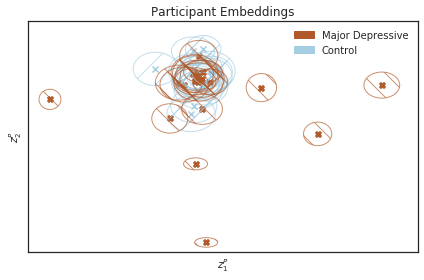

In [22]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None, colormap='Paired')

In [23]:
dtfa.average_reconstruction_error(weighted=False)

10/10/2020 17:11:14 Average reconstruction error (MSE): 7.03780202e+02 +/- 4.74260922e+01
10/10/2020 17:11:14 Average data norm (Euclidean): 8.29830954e+02 +/- 5.52383557e+01
10/10/2020 17:11:14 Percent average reconstruction error: 84.933730 +/- 4.72199352e+00


(array([739.14660645, 716.17211914, 650.98406982, 733.70074463,
        684.95959473, 695.20458984, 726.04022217, 708.99926758,
        630.60223389, 626.64465332, 641.51226807, 631.2635498 ,
        671.05883789, 723.37329102, 693.83416748, 680.51452637,
        659.4083252 , 687.39898682, 670.75164795, 684.90289307,
        733.33129883, 742.83197021, 751.61767578, 744.30133057,
        706.0892334 , 721.74890137, 715.84014893, 702.17108154,
        684.16931152, 756.30804443, 712.01257324, 735.21496582,
        679.24603271, 691.78509521, 687.81604004, 680.98522949,
        637.25610352, 638.48620605, 642.91784668, 604.43713379,
        716.88555908, 659.85339355, 708.79589844, 721.68200684,
        703.06243896, 717.13696289, 709.77960205, 737.67572021,
        731.89221191, 727.7331543 , 733.00646973, 709.08868408,
        748.65026855, 757.0760498 , 765.699646  , 775.04815674,
        747.9375    , 756.15155029, 756.2210083 , 735.13293457,
        710.64300537, 744.76550293, 687.